In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [137]:
df=pd.read_csv("marketing_campaign.csv")
print(df.shape)
df.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<AxesSubplot:>

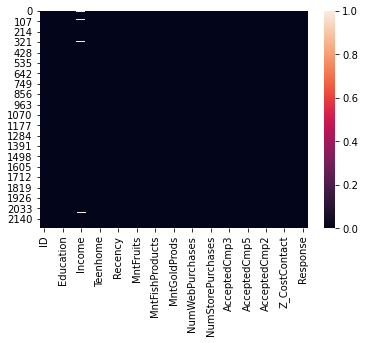

In [138]:
sns.heatmap(df.isnull())

In [139]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

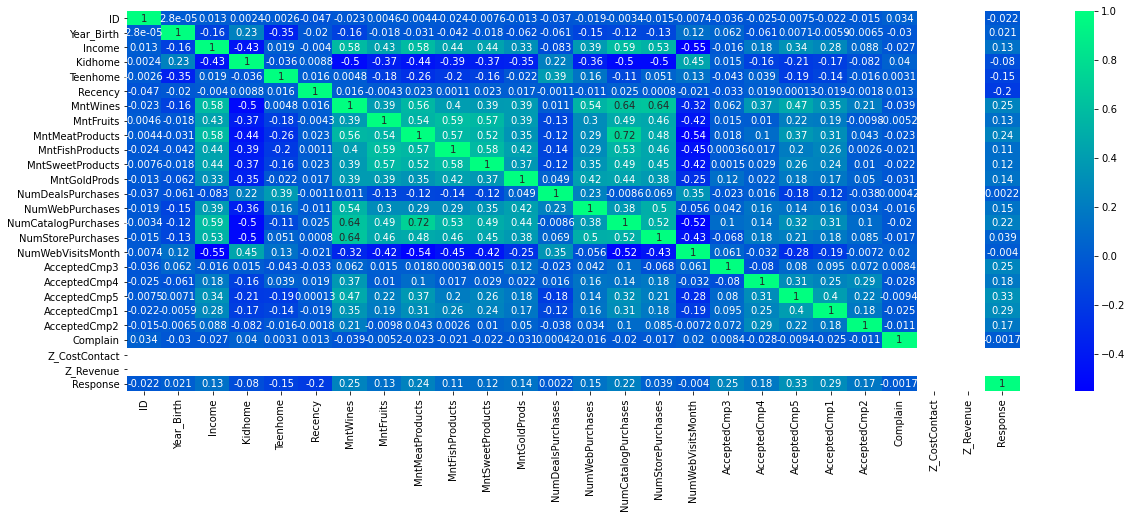

In [140]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,cmap="winter")
plt.show()

In [141]:
# z_contact and Z_revenue does not have any correlation .No two columns are too much correlated with each other so we can't drop any column on the basis of correlation.


<AxesSubplot:>

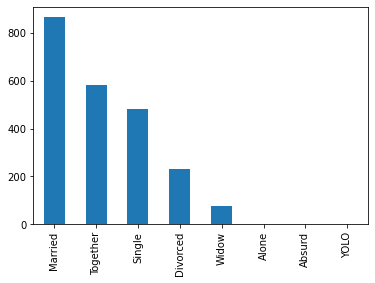

In [142]:
df["Marital_Status"].value_counts().plot(kind="bar")

In [143]:
#Processing the data and cleaning the data

In [144]:
# Number of days a customer was engaged with company
# Changing Dt_customer into timestamp format
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"])

In [145]:
df["2021"]="2021-01-01"
df["2021"]=pd.to_datetime(df["2021"])

In [146]:
df["day_joined"]=(df["2021"]- df["Dt_Customer"]).dt.days

In [147]:
#Adding new dataframe Age 
df["Age"]=2021
df["Age"]=df["Age"]-df["Year_Birth"]


In [148]:
#Combining kids and teens to new Dataframe DF["Kids"]
df["Kids"]=df["Kidhome"]+df["Teenhome"]

In [149]:
#Total expenses
df['Total_expense']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [150]:
#total accepted camp
df["totalacceptcamp"]=df['AcceptedCmp3']+df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp4']+df['AcceptedCmp5']

In [151]:
#total purchase
df['TotalNumOfPurchase']= df['NumWebPurchases']+ df['NumCatalogPurchases']+ df['NumStorePurchases']+df['NumDealsPurchases']

In [152]:
# dropping the unwanted columns

df.drop(['ID','Year_Birth','Dt_Customer','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp1','AcceptedCmp2',
'AcceptedCmp4','AcceptedCmp5','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases',
'NumWebVisitsMonth','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
'2021','Recency','Complain','Response','Z_CostContact','Z_Revenue'],axis=1, inplace=True)

In [153]:
df.head()

,Education,Marital_Status,Income,day_joined,Age,Kids,Total_expense,totalacceptcamp,TotalNumOfPurchase
0,Graduation,Single,58138.0,3189,64,0,1617,0,25
1,Graduation,Single,46344.0,2343,67,2,27,0,6
2,Graduation,Together,71613.0,2690,56,0,776,0,21
3,Graduation,Together,26646.0,2283,37,1,53,0,8
4,PhD,Married,58293.0,2539,40,1,422,0,19


In [154]:
df["Income"]=df["Income"].mean() # filling the missing value with mean value of the income column

In [155]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [156]:
df["Education"]=df["Education"].replace(["Graduation","PhD","Master","2n Cycle"],"PG")
df["Education"]=df["Education"].replace(["Basic"],"UG")

In [157]:
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [158]:
df["Marital_Status"]=df["Marital_Status"].replace(["Married","Together"],"In relationship")
df["Marital_Status"]=df["Marital_Status"].replace(["Single","Divorced","Widow","Alone","Absurd","YOLO"],"single")

In [159]:
df.head()

,Education,Marital_Status,Income,day_joined,Age,Kids,Total_expense,totalacceptcamp,TotalNumOfPurchase
0,PG,single,52247.251354,3189,64,0,1617,0,25
1,PG,single,52247.251354,2343,67,2,27,0,6
2,PG,In relationship,52247.251354,2690,56,0,776,0,21
3,PG,In relationship,52247.251354,2283,37,1,53,0,8
4,PG,In relationship,52247.251354,2539,40,1,422,0,19


In [160]:
obj=[]

for i in df.columns:
    if df[i].dtype=="O":
        obj.append(i)
print(obj)        

['Education', 'Marital_Status']


In [161]:
label_encode =LabelEncoder()
for x in obj:
    df[x] = df[[x]].apply(label_encode.fit_transform)
  

In [162]:
df.head()

,Education,Marital_Status,Income,day_joined,Age,Kids,Total_expense,totalacceptcamp,TotalNumOfPurchase
0,0,1,52247.251354,3189,64,0,1617,0,25
1,0,1,52247.251354,2343,67,2,27,0,6
2,0,0,52247.251354,2690,56,0,776,0,21
3,0,0,52247.251354,2283,37,1,53,0,8
4,0,0,52247.251354,2539,40,1,422,0,19


In [166]:
df1=df.copy()

In [169]:
scaler=StandardScaler().fit_transform(df1.values)
scalar_df=pd.DataFrame(scaler,index=df1.index,columns=df.columns)

In [170]:
scalar_df.head()

,Education,Marital_Status,Income,day_joined,Age,Kids,Total_expense,totalacceptcamp,TotalNumOfPurchase
0,-0.157171,1.346874,-1.0,1.976745,0.985345,-1.264505,1.679417,-0.439037,1.320826
1,-0.157171,1.346874,-1.0,-1.667011,1.235733,1.396361,-0.961275,-0.439037,-1.154596
2,-0.157171,-0.742460,-1.0,-0.172468,0.317643,-1.264505,0.282673,-0.439037,0.799685
3,-0.157171,-0.742460,-1.0,-1.925433,-1.268149,0.065928,-0.918094,-0.439037,-0.894025
4,-0.157171,-0.742460,-1.0,-0.822831,-1.017761,0.065928,-0.305254,-0.439037,0.539114


In [171]:
from sklearn.cluster import KMeans

#Elbow method

[17919.999999999985, 13990.433249089476, 11728.759699606102, 10302.919668856095, 9146.327305789819, 8302.437445905218, 7690.85493292242, 7224.765593925934, 6884.8074910784835, 6518.297971134941]
6518.297971134941


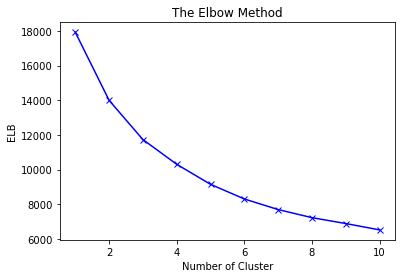

In [174]:
Elb=[]

for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,random_state=101)
    Kmeans.fit(scalar_df)
    Elb.append(Kmeans.inertia_)
print(Elb)
print(Kmeans.inertia_)

plt.plot(range(1,11),Elb,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('ELB')
plt.show()

In [175]:
from sklearn.metrics import silhouette_score 

2 0.22378682214730788
3 0.24792432901975892
4 0.2252236624806318
5 0.21372811643696238
6 0.2276530032938676
7 0.2112264694211364
8 0.21407610365501323
9 0.21457217823901661
10 0.20747577562739677


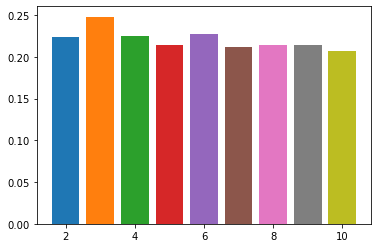

In [180]:
def clustering(n_cluster,X):
    KM=KMeans(n_clusters=n_cluster)
    KM.fit(X)
    labels=KM.predict(X)
    print(n_cluster,silhouette_score(X,labels))
    plt.bar(n_cluster,silhouette_score(X,labels))
    
for n_cluster in range(2,11):
    clustering(n_cluster,scalar_df)
    

In [ ]:
# we can conclude the 3rd cluster is giving the highest silhouette score

In [182]:
KG=KMeans(n_clusters=3,random_state=121)
KG.fit(scalar_df)
Predicted=KG.predict(scalar_df)

In [186]:
df["Cluster"]=Predicted+1

In [187]:
df.head()

,Education,Marital_Status,Income,day_joined,Age,Kids,Total_expense,totalacceptcamp,TotalNumOfPurchase,Cluster
0,0,1,52247.251354,3189,64,0,1617,0,25,1
1,0,1,52247.251354,2343,67,2,27,0,6,2
2,0,0,52247.251354,2690,56,0,776,0,21,1
3,0,0,52247.251354,2283,37,1,53,0,8,2
4,0,0,52247.251354,2539,40,1,422,0,19,2


<AxesSubplot:>

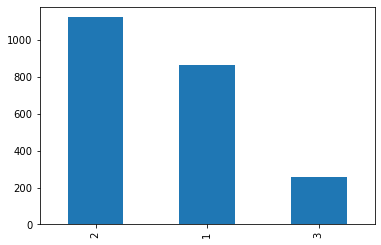

In [189]:
df["Cluster"].value_counts().plot(kind="bar")